## Exercise 3: Random Networks


In [1]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

### Task 1: Erdos-Renyi Graphs

#### a) Implementing Erdos-Renyi Graphs
Implement the Erdos-Renyi Random graph model, using the signature in the cell below.

In [2]:
def er_graph(n,p):
    """
    :param n: number of nodes
    :param p: edge probability in [0,1]
    :
    :return: networkx graph
    """
    G=nx.Graph()
    G.add_nodes_from(range(n)) 
    for i in range(n):
        for j in range(i+1,n):
            if (np.random.rand() < p):
                G.add_edge(i,j) #
    return G

#### b) Diameter

Use your implementation to create a random graph with 1000 nodes and average degree 10. What is the diameter of the resulting network? Do you oberve the small-world effect?

In [3]:
G = er_graph(1000,10/999)
print(nx.info(G))
print(nx.diameter(G))

Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 4964
Average degree:   9.9280
6


__Answer__: We clearly observe the small-world effect, as in this graph with 1000 nodes, every pair of nodes only has a maximum distance of 6 to each other. 

#### c) Degree Distribution

Make use of histograms to plot the degree distribution of the network from b).
After that, draw 1000 times from a poisson distribution and plot the histogram of outcomes. Are the resulting plots similar?

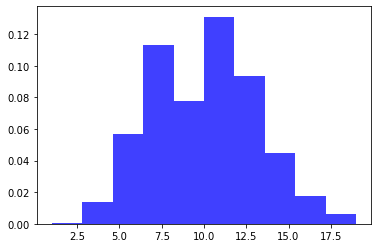

In [4]:
degrees = list(dict(nx.degree(G)).values())
n, bins, patches= plt.hist(degrees, density=True, facecolor='blue', alpha=0.75);

(array([0.00666667, 0.02833333, 0.08611111, 0.13277778, 0.06666667,
        0.12388889, 0.06666667, 0.03277778, 0.00888889, 0.00277778]),
 array([ 2. ,  3.8,  5.6,  7.4,  9.2, 11. , 12.8, 14.6, 16.4, 18.2, 20. ]),
 <BarContainer object of 10 artists>)

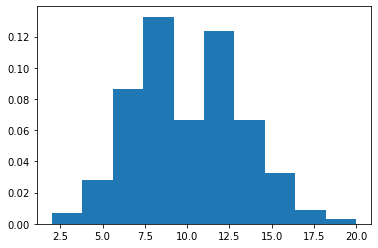

In [5]:
plt.hist(np.random.poisson(10,1000), density=True)

**Answer:** As expected, the ER graph appears to have a Poisson degree distribution.

#### d) Emergence of a Giant Component

Use the random graph generator from NetworkX to create 100 random graphs with 300 nodes and average degrees linearly increasing from $c = 0.1$ to $c = 4$.
Using these graphs, plot the share of nodes in the largest connected component (on the y-axis) as a function of the average degree (on the x-axis).
At what average degree do you observe the emergence of a giant component?

In [6]:
avg_degrees = np.linspace(0.1,4,100)
graphs = dict([(i,nx.erdos_renyi_graph(300,avg_degrees[i]/299)) for i in range(100)])

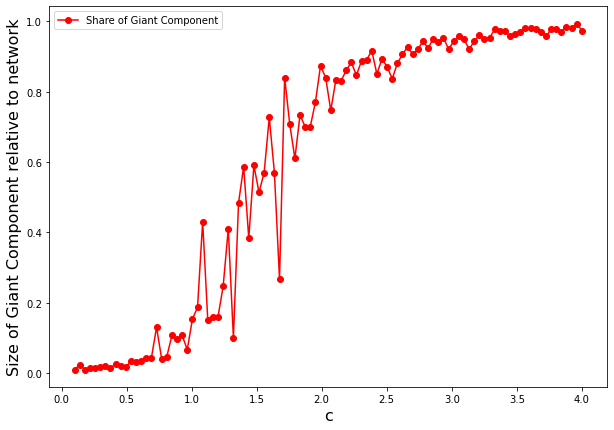

In [7]:
import matplotlib.pyplot as plt
shares = [sorted([len(x) for x in nx.connected_components(G)],reverse=True)[0]/300 for G in graphs.values()]

fig = plt.figure(figsize=(10,7))
plt.plot(np.linspace(0.1,4,100), shares, '-o',color='red',label='Share of Giant Component')
plt.xscale('linear')
plt.xlabel('c', fontsize=16)
plt.ylabel('Size of Giant Component relative to network', fontsize=16)
#sns.despine()

plt.legend()
plt.show()

__Answer:__ The emergence starts around c=1.

### Task 2: The Watts-Strogatz Model


####  a)  Creating a Watts-Strogatz Graph
Utilize the networkX implementation of the Watts-Strogatz model to create a Watts-Strogatz graph with $N=50$ nodes, average degree $\langle k\rangle =4$, and rewiring probability $p = 0.3$. 
Print some basic statistics of the graph, and consider its average clustering and diameter.

In [8]:
N = 50
k = 4 # average degree
p = 0.3 #probability of rewiring
H = nx.watts_strogatz_graph(N, k, p)

In [9]:
# Network statistics
degree=list(dict(nx.degree(H)).values())
print ('#nodes: %i' % G.number_of_nodes())
print ('#links: %i' % G.number_of_edges())
print ('Average degree: %0.4f' % np.mean(degree))
print ('Max degree: %i' % np.max(degree))
print ('Min degree: %i' % np.min(degree))
print ('Average Clustering: %0.4f' % nx.average_clustering(G))
print ('Average shortest path length: %3.4f' % nx.average_shortest_path_length(G))

#nodes: 1000
#links: 4964
Average degree: 4.0000
Max degree: 6
Min degree: 2
Average Clustering: 0.0096
Average shortest path length: 3.2684


#### b) Changing the Rewiring Probability
Create three graphs with  $N=50$ and $\langle k\rangle =4$ as before, but varying rewiring probability $p\in\{0.1,0.3,0.9\}$.
Plot each of these graphs using a circular layout, and plot its degree distribution like in task 1).

In [10]:
H1 = nx.watts_strogatz_graph(N, k, 0.1)
H2 = nx.watts_strogatz_graph(N, k, 0.9)

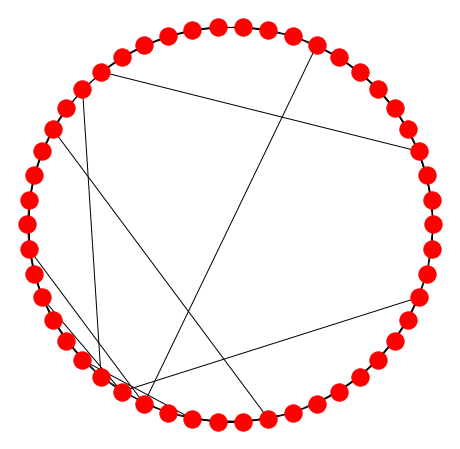

In [11]:
pos = nx.circular_layout(H1);
plt.figure(figsize=(8,8));
plt.axis("off");
nx.draw(H1, pos, node_size=300, node_color="red")

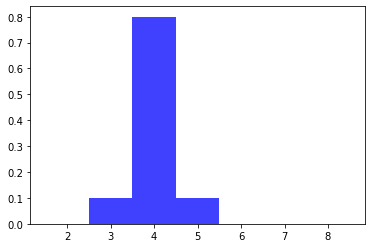

In [12]:
degrees1 = list(dict(nx.degree(H1)).values())
n, bins, patches= plt.hist(degrees1, density=True, bins=[1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5], facecolor='blue', alpha=0.75);

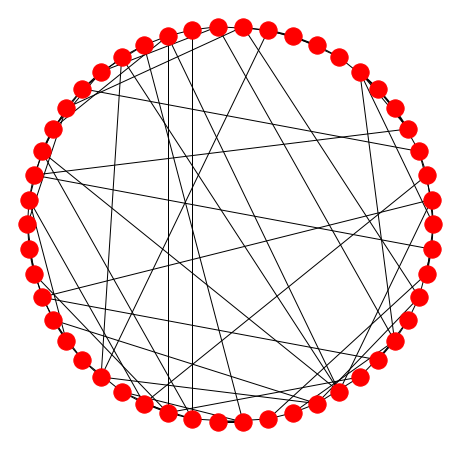

In [13]:
pos = nx.circular_layout(H);
plt.figure(figsize=(8,8));
plt.axis("off");
nx.draw(H, pos, node_size=300, node_color="red")

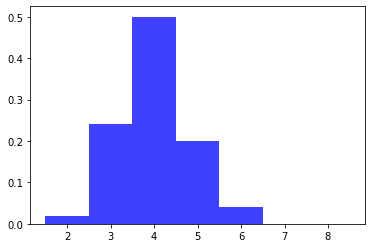

In [14]:
degrees = list(dict(nx.degree(H)).values())
n, bins, patches= plt.hist(degrees, density=True, bins=[1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5],  facecolor='blue', alpha=0.75);

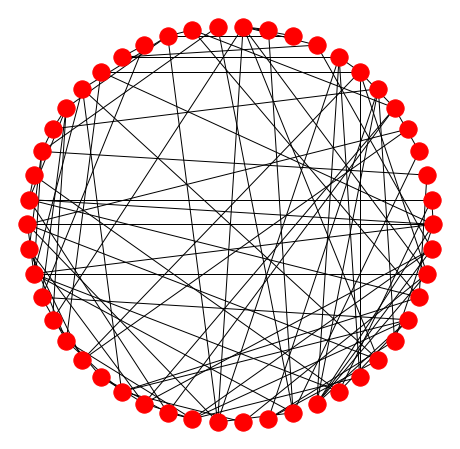

In [15]:
pos = nx.circular_layout(H2);
plt.figure(figsize=(8,8));
plt.axis("off");
nx.draw(H2, pos, node_size=300, node_color="red")

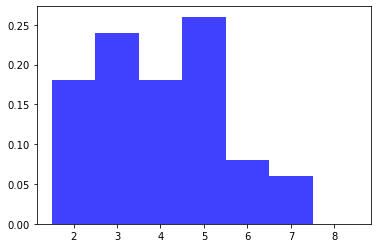

In [16]:
degrees2 = list(dict(nx.degree(H2)).values())
n, bins, patches= plt.hist(degrees2, density=True, bins=[1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5], facecolor='blue', alpha=0.75);

#### c) Local Clustering versus average path length
Finally, we try to recreate the plot of the normalized average path average path length and clustering coefficient.
Thus, for $N=600$ and $\langle k\rangle = 6$, create graphs with varying rewiring probabilities $p \in \{0.001,0.005,0.01,0.02,0.1,1\}$, and compute both the the average clustering as well as the average shortest path lengths of these graphs. In the end, normalize the average clustering values by the maximum value that has ocurred within these graphs, and the average shortest path length by the maximum possible value 50, and plot the resulting values as line graphs against $p$. 

In [17]:
N= 600 #(600 nodes)
k= 6 #connected to 3 neighbors on each side
path_lengths = []
clustering = []
for p in [.001,.005,.01,.02,.1,1]:
    G=nx.watts_strogatz_graph(N, k, p)  
    path_lengths.append(nx.average_shortest_path_length(G))
    clustering.append(np.mean(list(nx.clustering(G).values())))

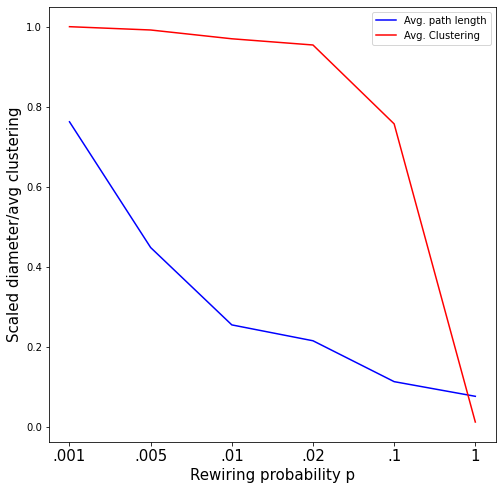

In [19]:
fig= plt.figure(figsize=(8,8))
plt.plot([x/50 for x in path_lengths],label='Avg. path length',color='Blue')
plt.plot([x/max(clustering) for x in clustering],label='Avg. Clustering',color='Red')
plt.xlabel('Rewiring probability p',size=15)
plt.ylabel('Scaled diameter/avg clustering',size=15)
plt.xticks([0,1,2,3,4,5])
fig.axes[0].set_xticklabels(['.001','.005','.01','.02','.1','1'],size=15)
plt.legend()